In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: AnahiRomo

"""

# cargamos las librerías que usaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn import linear_model as lm
from sklearn.metrics import r2_score



In [ ]:
# definimos funciones

def graficar_x_y(x, y, color):
    '''Dados valores x e y, grafica dichos puntos '''
    plt.scatter(x, y, c = color)           # Grafica los puntos (x, y) con el color indicado
    plt.title('I vs V')                    # Título del gráfico
    plt.xlabel('V')                        # Etiqueta eje X
    plt.ylabel('I')                        # Etiqueta eje Y
    plt.show()                             # Muestra el gráfico
    plt.close()                            # Cierra la figura para liberar memoria
    return

def func(x, a, b, c):
    """Defino la función que propongo para ajustar los datos medidos de I vs V.
    ´x´ es la variable independiente, mientras que a, b y c son los
    coeficientes que se deben ajustar. """
    return a + b * np.exp(c*x)             # Retorna el valor de la función para cada x

def AIC(ecm, num_params):
    '''Calcula el AIC de una regresión lineal múltiple de 'num_params' parámetros,
    y que da lugar a un error cuadrático medio 'ecm'.'''
    aic = -2* np.log(ecm) + 2 * num_params # Calcula el Akaike Information Criterion
    return aic                             # Retorna

In [3]:
# cargamos los datos en un df, cambiando separador que no es 'coma' sino 'tab'
url = "https://raw.githubusercontent.com/palasatenea66/DATASETS/main/datos_V_I.txt"

data = pd.read_csv(url, sep = '\t')
print(data.shape)
print(data.columns)
data

(12, 16)
Index(['Vcelda1', 'Icelda1', 'Vcelda2', 'Icelda2', 'Vcelda3', 'Icelda3',
       'Vcelda4', 'Icelda4', 'Vcelda5', 'Icelda5', 'Vcelda6', 'Icelda6',
       'Vcelda7', 'Icelda7', 'Vcelda8', 'Icelda8'],
      dtype='object')


,Vcelda1,Icelda1,Vcelda2,Icelda2,Vcelda3,Icelda3,Vcelda4,Icelda4,Vcelda5,Icelda5,Vcelda6,Icelda6,Vcelda7,Icelda7,Vcelda8,Icelda8
0,0.0,5.46,0.0,5.501,0.0,5.50,0.0,5.44,0.0,5.39,0.0,5.45,0.0,5.51,0.0,5.30
1,2.3,5.43,0.9,5.490,0.6,5.46,0.5,5.44,2.6,5.39,0.7,5.45,0.6,5.48,2.9,5.28
2,6.8,5.42,2.7,5.490,2.1,5.45,2.9,5.43,7.2,5.38,2.0,5.44,2.6,5.47,6.5,5.27
3,11.0,5.32,7.2,5.490,8.2,5.42,6.6,5.42,11.4,5.30,7.3,5.43,9.6,5.46,8.4,5.26
4,16.5,4.44,13.8,5.370,15.7,4.89,11.7,5.40,15.6,4.73,15.5,4.86,16.0,4.67,14.0,5.18
5,17.7,3.45,17.4,4.070,18.1,3.15,15.1,5.00,17.5,3.50,17.1,3.85,17.3,3.66,15.9,4.84
6,18.3,2.80,18.3,3.130,18.6,2.46,17.3,3.56,18.2,2.72,18.1,2.80,18.0,2.86,16.7,4.50
7,18.7,2.31,18.8,2.590,18.9,2.10,18.1,2.68,18.6,2.26,18.6,2.09,18.4,2.35,17.8,3.64
8,18.9,1.96,19.1,2.050,19.1,1.83,18.6,2.07,18.9,1.90,18.8,1.81,18.6,2.13,18.5,2.94
9,19.1,1.73,19.3,1.810,19.2,1.63,18.8,1.81,19.0,1.70,18.9,1.68,18.8,1.79,19.3,1.89


In [4]:
dat = data.filter(['Vcelda1', 'Icelda1'], axis = 1)
print(dat.shape)
dat

(12, 2)


,Vcelda1,Icelda1
0,0.0,5.46
1,2.3,5.43
2,6.8,5.42
3,11.0,5.32
4,16.5,4.44
5,17.7,3.45
6,18.3,2.80
7,18.7,2.31
8,18.9,1.96
9,19.1,1.73


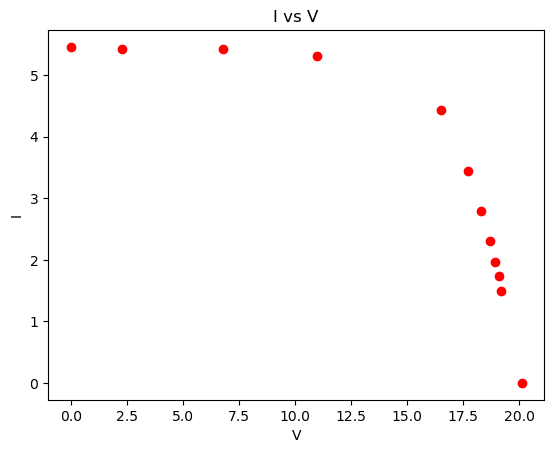

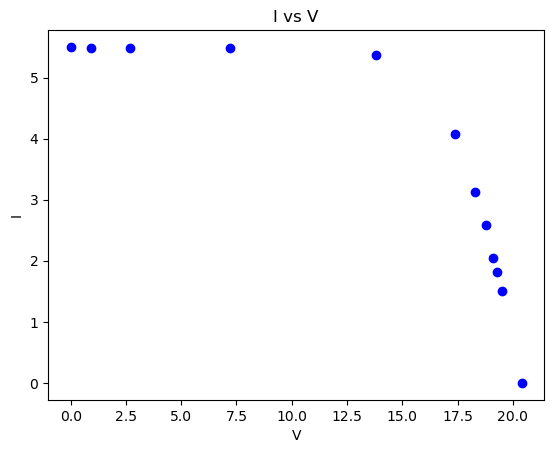

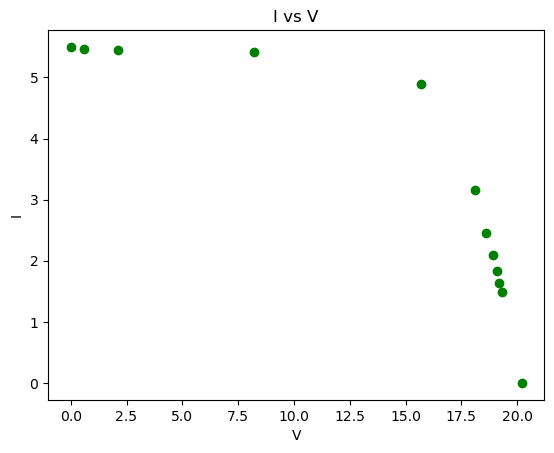

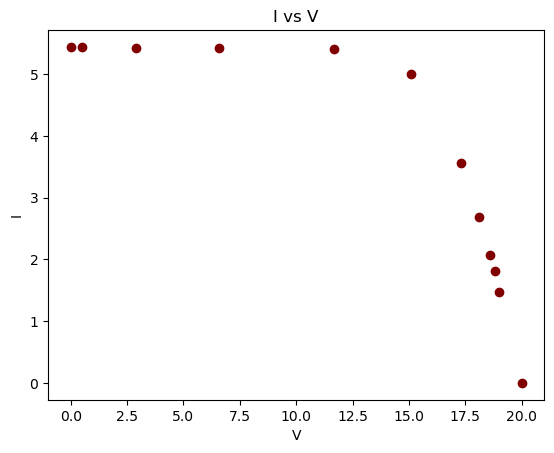

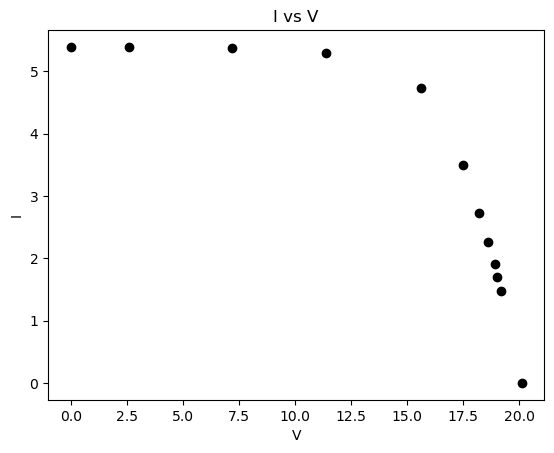

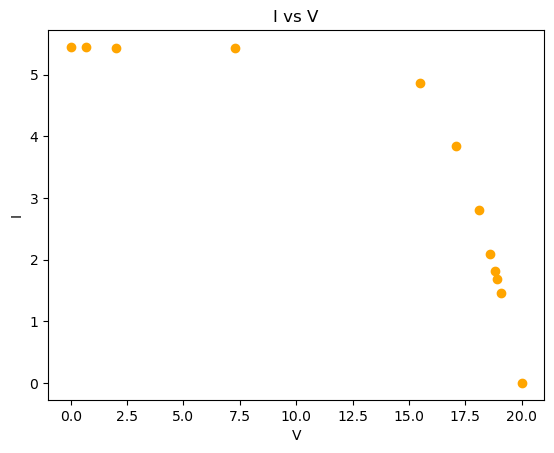

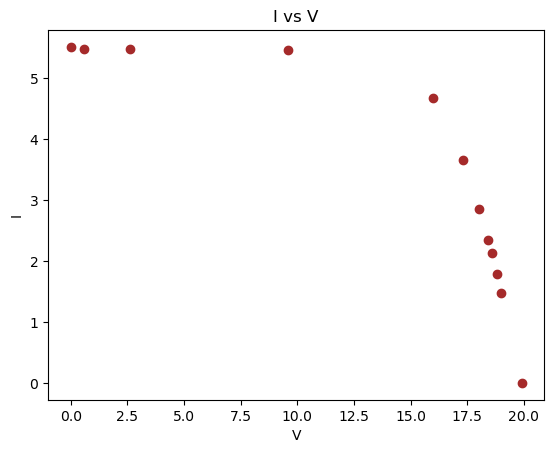

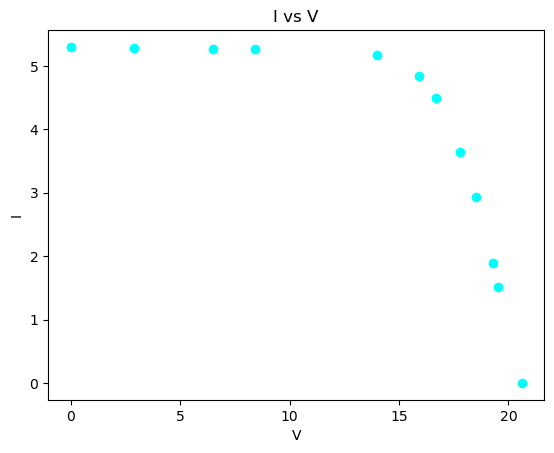

In [5]:
# Ahora vamos a graficar los datos para ver qué aspecto tienen

val = [(data['Vcelda1'], data['Icelda1'], 'red', 'celda1'),
       (data['Vcelda2'], data['Icelda2'], 'blue', 'celda2'),
       (data['Vcelda3'], data['Icelda3'], 'green', 'celda3'),
       (data['Vcelda4'], data['Icelda4'], 'maroon', 'celda4'),
       (data['Vcelda5'], data['Icelda5'], 'black', 'celda5'),
       (data['Vcelda6'], data['Icelda6'], 'orange', 'celda6'),
       (data['Vcelda7'], data['Icelda7'], 'brown', 'celda7'),
       (data['Vcelda8'], data['Icelda8'], 'cyan','celda8')]

for i in range(0, 8):
    graficar_x_y(val[i][0], val[i][1], val[i][2])



In [7]:
#%% OPCIÓN 3 -> USAR CURVE FIT
# ------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------

# transforma datos en un array de numpy para que curve_fit pueda trabajar
x3 = np.array(dat['Vcelda1'], dtype=float)    # Extrae la columna de voltaje y la convierte a array de floats
y3 = np.array(dat['Icelda1'], dtype=float)    # Extrae la columna de corriente y la convierte a array de floats

# llama a curve_fit para que ajuste los coeficientes de la función sugerida (func)
popt, pcov = curve_fit(func, x3, y3)          # Ajusta los parámetros a, b, c de la función func(x, a, b, c)

print(f'Coef: {popt}')                        # Muestra los coeficientes ajustados por curve_fit

ecm3 = ((y3 - func(x3, *popt))**2).mean()     # Calcula el error cuadrático medio entre los datos y el modelo ajustado

print(f'Akaike Inf Criterion: {AIC(len(popt), ecm3)}')  # Calcula y muestra el AIC usando el ECM y número de parámetros
print(f'Precisión sobre valores ingresados: {r2_score(y3, func(x3, *popt))}')  # Muestra el R²

Coef: [ 5.46869712e+00 -1.31975003e-03  4.15596965e-01]
Akaike Inf Criterion: -2.1800031211017967
Precisión sobre valores ingresados: 0.9973336188017514


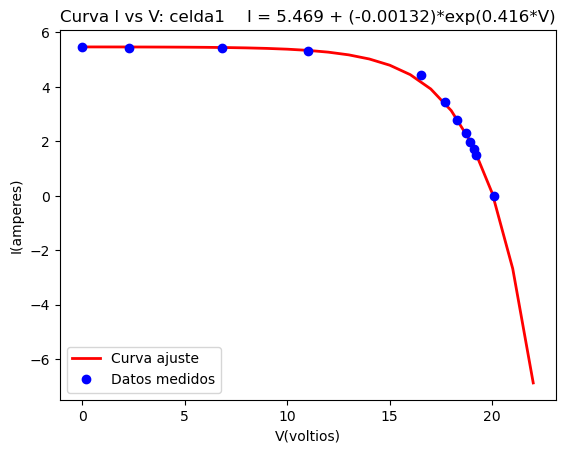

In [ ]:
v = np.arange(0, 23, 1)  # creo un vector V para evaluar la curva de ajuste

# grafico
plt.figure()  # crea una nueva figura para el gráfico

# la curva de ajuste va en línea roja
plt.plot(v, func(v, *popt), label="Curva ajuste", color = "red", linewidth = 2)  # grafica la curva ajustada usando los coeficientes encontrados

plt.plot(x3, y3, 'bo', label="Datos medidos")   # grafica los datos originales como puntos azules ("bo" = blue circles)

plt.legend(loc='lower left')  # muestra la leyenda en la esquina inferior izquierda

plt.xlabel("V(voltios)")  # etiqueta del eje X

plt.ylabel("I(amperes)")  # etiqueta del eje Y

plt.title("Curva I vs V: %s" % (celda), loc = "left")  # título con el nombre de la celda, alineado a la izquierda

# ecuación de la curva ajustada con sus coeficientes
plt.title("I = %s + (%s)*exp(%s*V)" % (round(popt[0],3), round(popt[1],5),
                                       round(popt[2],3)), loc = "right")  # muestra la ecuación ajustada con los coeficientes, alineado a la derecha

# plt.savefig('fig.png', dpi=300)    # guarda el gráfico como .png (línea comentada)

plt.show()  # muestra el gráfico en pantalla

plt.close()  # cierra la figura para liberar memoria

#Se conoce la relación entre I y V: es del tipo I = a + b.exp(c.V) y hay que calcular a, b, c.

#Compararemos la predicción con los datos y graficaremos

In [ ]:
# OPCIÓN 1: HACER UNA REGRESIÓN SEMILOG: log I = alfa + beta.V (Debemos eliminar el valor de I = 0)
# ------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------
# Se elimina el valor de I = 0 para evitar problemas con el logaritmo
dat1 = dat.drop(dat.index[11])  # Elimina la fila 11 del DataFrame 'dat' (donde Icelda1 es 0)

# Se crea una nueva columna con el logaritmo de la corriente
dat1['log I'] = np.log(dat1['Icelda1'])  # Calcula el logaritmo natural de la columna 'Icelda1'

print(dat1.head(11))  # Muestra las primeras 11 filas del DataFrame modificado

celda = val[0][3]  # Obtiene el nombre de la celda (por ejemplo, 'celda1')

# Se crea el modelo de regresión lineal
modelo = lm.LinearRegression()  # Instancia un modelo de regresión lineal de sklearn

# Prepara los datos de entrada para el modelo
x1 = dat1['Vcelda1'].values.reshape(-1,1)  # Convierte la columna 'Vcelda1' en un array columna
y1 = dat1['log I'].values  # Obtiene los valores de la columna 'log I' como array

# Entrena el modelo usando los datos preparados
modelo.fit(x1, y1)  # Ajusta el modelo usando Vcelda1 como variable independiente y log I como dependiente

print(f'Precisión sobre valores ingresados: {modelo.score(x1, y1)}')  # Muestra el R² del ajuste

print(type(x1))  # Muestra el tipo de dato de

    Vcelda1  Icelda1     log I
0       0.0     5.46  1.697449
1       2.3     5.43  1.691939
2       6.8     5.42  1.690096
3      11.0     5.32  1.671473
4      16.5     4.44  1.490654
5      17.7     3.45  1.238374
6      18.3     2.80  1.029619
7      18.7     2.31  0.837248
8      18.9     1.96  0.672944
9      19.1     1.73  0.548121
10     19.2     1.49  0.398776
Precisión sobre valores ingresados: 0.6452389578143436
<class 'numpy.ndarray'>


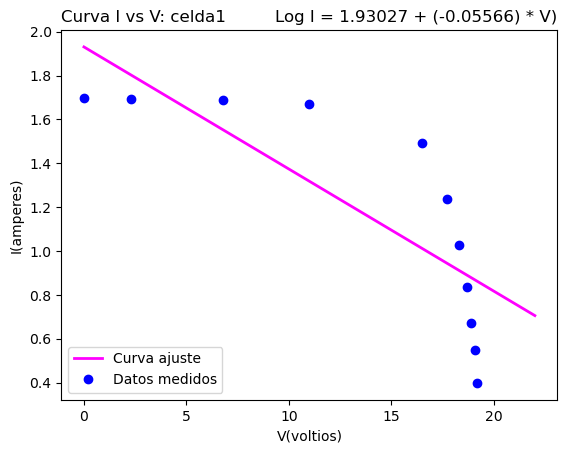

In [8]:
v = np.arange(0, 23, 1)  # creo un vector de valores de V para evaluar la curva de ajuste
alfa = modelo.intercept_
beta = modelo.coef_
logI = alfa + beta * v
# graficamos
plt.figure()
plt.plot(v, logI, label="Curva ajuste", color = "magenta", linewidth = 2)
plt.plot(x1, y1, 'bo', label="Datos medidos")   # "bo" significa círculos azules
plt.legend(loc='lower left')
plt.xlabel("V(voltios)")
plt.ylabel("I(amperes)")
plt.title(f"Curva I vs V: {celda}", loc = "left")
# ecuación de la curva ajustada con sus coeficientes
plt.title(f"Log I = {round(float(alfa), 5)} + ({round(float(beta[0]), 5)}) * V)", loc = "right")
# plt.savefig('fig.png', dpi=300)    # guarda el gráfico como .png
plt.show()
plt.close()

In [ ]:
#%% OPCIÓN 2: hacer regresión polinomial
# ------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------

# depende del grado del polinomio de ajuste
# supongamos n = 3

dat['V**2'] = dat['Vcelda1']**2
dat['V**3'] = dat['Vcelda1']**3
dat['V**4'] = dat['Vcelda1']**4
dat['V**5'] = dat['Vcelda1']**5
dat['V**6'] = dat['Vcelda1']**6
dat['V**7'] = dat['Vcelda1']**7

dat

,Vcelda1,Icelda1,V**2,V**3,V**4,V**5,V**6,V**7
0,0.0,5.46,0.00,0.000,0.0000,0.000000e+00,0.000000e+00,0.000000e+00
1,2.3,5.43,5.29,12.167,27.9841,6.436343e+01,1.480359e+02,3.404825e+02
2,6.8,5.42,46.24,314.432,2138.1376,1.453934e+04,9.886748e+04,6.722989e+05
3,11.0,5.32,121.00,1331.000,14641.0000,1.610510e+05,1.771561e+06,1.948717e+07
4,16.5,4.44,272.25,4492.125,74120.0625,1.222981e+06,2.017919e+07,3.329566e+08
5,17.7,3.45,313.29,5545.233,98150.6241,1.737266e+06,3.074961e+07,5.442681e+08
6,18.3,2.80,334.89,6128.487,112151.3121,2.052369e+06,3.755835e+07,6.873179e+08
7,18.7,2.31,349.69,6539.203,122283.0961,2.286694e+06,4.276118e+07,7.996340e+08
8,18.9,1.96,357.21,6751.269,127598.9841,2.411621e+06,4.557963e+07,8.614551e+08
9,19.1,1.73,364.81,6967.871,133086.3361,2.541949e+06,4.855123e+07,9.273284e+08


In [10]:
# supongamos polinomio de grado n = 3

x2 = dat.filter(['Vcelda1', 'V**2', 'V**3'], axis = 1)
y2 = dat['Icelda1'].values

poli1 = lm.LinearRegression()
poli1.fit(x2, y2)  #usa las potencias para entrenar

ecm1 = ((y2 - poli1.predict(x2))**2).mean()
num_p1 = len(poli1.coef_) + 1
print(f'Precisión sobre valores ingresados: {poli1.score(x2, y2)}')
print(f'Akaike Information Criterion (AIC): {AIC(ecm1, num_p1)}')
print(f'Coeficientes: {float(poli1.intercept_)} \n {poli1.coef_}')


Precisión sobre valores ingresados: 0.9831769494596175
Akaike Information Criterion (AIC): 13.825437184616096
Coeficientes: 5.690669276239639 
 [-0.42927958  0.07892108 -0.00352697]


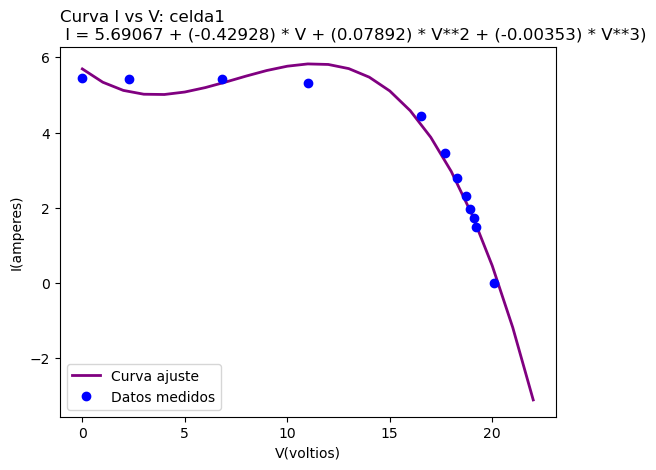

In [11]:
v = np.arange(0, 23, 1)  # creo un vector V para evaluar la curva de ajuste

alfa = poli1.intercept_
beta = poli1.coef_[0]
gama = poli1.coef_[1]
delta = poli1.coef_[2]

polinomio1 = alfa + beta * v + gama * v**2 + delta * v**3

# graficamos
plt.figure()
plt.plot(v, polinomio1, label="Curva ajuste", color = "purple", linewidth = 2)
plt.plot(dat['Vcelda1'].values.reshape(-1,1), y2, 'bo', label="Datos medidos")
plt.legend(loc='lower left')
plt.xlabel("V(voltios)")
plt.ylabel("I(amperes)")
# ecuación de la curva ajustada con sus coeficientes
plt.title(f"Curva I vs V: {celda} \n I = {round(float(alfa), 5)} + ({round(float(beta), 5)}) * V + ({round(float(gama), 5)}) * V**2 + ({round(float(delta), 5)}) * V**3)", loc = "left")
# plt.savefig('fig.png', dpi=300)    # guarda el gráfico como .png
plt.show()
plt.close()


In [12]:
# Ahora probamos con Polinomio con grado n= 7

poli2 = lm.LinearRegression()
x2bis = dat.filter(['Vcelda1', 'V**2', 'V**3', 'V**4', 'V**5', 'V**6', 'V**7'],
                   axis = 1)

poli2.fit(x2bis, y2)  #usa las potencias para entrenar

ecm2 = ((y2 - poli2.predict(x2bis))**2).mean()
num_p2 = len(poli2.coef_) + 1
p1 = poli2.intercept_ + poli2.coef_[0] * v + poli2.coef_[1] * v**2
p2 = poli2.coef_[2] * v**3 + poli2.coef_[3] * v**4 + poli2.coef_[4] * v**5
p3 = poli2.coef_[5] * v**6 + poli2.coef_[6] * v**7
polinomio2 = p1 + p2 + p3
print(f'Precisión sobre valores ingresados: {poli2.score(x2bis, y2)}')
print(f'Akaike Information Criterion (AIC): {AIC(ecm2, num_p2)}')
print(f'Coeficientes: {poli2.intercept_} \n {poli2.coef_}')


Precisión sobre valores ingresados: 0.999837969199526
Akaike Information Criterion (AIC): 31.11087485944598
Coeficientes: 5.459995976637606 
 [-1.15111272e-02 -1.55636469e-02  1.10190944e-02 -2.48093413e-03
  2.44396372e-04 -1.08453927e-05  1.73444195e-07]


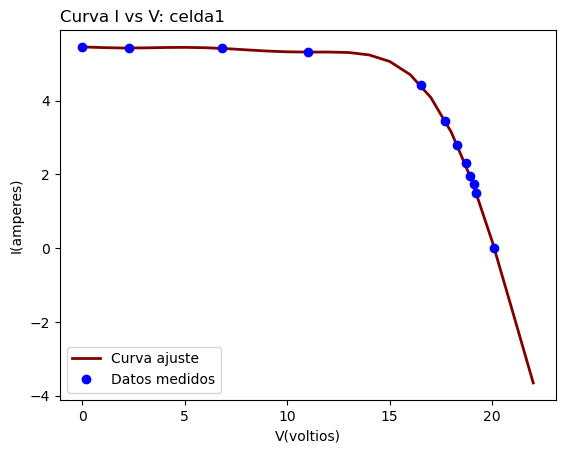

In [13]:
plt.figure()
plt.plot(v, polinomio2, label="Curva ajuste", color = "maroon", linewidth = 2)
plt.plot(dat['Vcelda1'].values.reshape(-1,1), y2, 'bo', label="Datos medidos")
plt.legend(loc='lower left')
plt.xlabel("V(voltios)")
plt.ylabel("I(amperes)")
# ecuación de la curva ajustada con sus coeficientes
plt.title(f"Curva I vs V: {celda} ", loc = "left")
# plt.savefig('fig.png', dpi=300)    # guarda el gráfico como .png

plt.show()
plt.close()